In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')
titanic_train
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train['Ticket'].value_counts()

1601                7
CA. 2343            7
347082              7
CA 2144             6
3101295             6
                   ..
112277              1
SOTON/O2 3101287    1
2689                1
SOTON/OQ 3101317    1
349228              1
Name: Ticket, Length: 681, dtype: int64

In [5]:
titanic_train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
F33            3
              ..
C148           1
B94            1
E10            1
F G63          1
E58            1
Name: Cabin, Length: 147, dtype: int64

In [6]:
titanic_train['Name'].value_counts()

Flynn, Mr. James                                1
Aks, Mrs. Sam (Leah Rosen)                      1
Jarvis, Mr. John Denzil                         1
Reeves, Mr. David                               1
Farrell, Mr. James                              1
                                               ..
Calic, Mr. Jovo                                 1
Fleming, Miss. Margaret                         1
Harris, Mrs. Henry Birkhardt (Irene Wallach)    1
Newell, Miss. Madeleine                         1
Ball, Mrs. (Ada E Hall)                         1
Name: Name, Length: 891, dtype: int64

### Checking the null values

In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

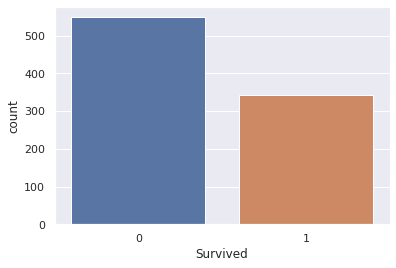

In [9]:
import seaborn as sns
sns.set(style = "darkgrid")
sns.countplot(x = 'Survived', data =titanic_train)

In [10]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Droping missing values

In [11]:
titanic_data = titanic_train.drop(['Name','Ticket','Cabin'],axis = 1)
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [12]:
test_data = titanic_test.drop(['Name','Ticket','Cabin'],axis = 1)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [13]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Converting categorical to numerical data

In [14]:

titanic_data['Sex'].replace(to_replace=["male","female"], value=[0,1],inplace=True)


In [15]:

test_data['Sex'].replace(to_replace=["male","female"], value=[0,1],inplace=True)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [17]:
test_data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [18]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
titanic_data['Embarked'].replace(to_replace=['S','C','Q'], value=[1,2,3],inplace=True)

In [20]:
test_data['Embarked'].replace(to_replace=['S','C','Q'], value=[1,2,3],inplace=True)

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1.0
1,2,1,1,1,38.0,1,0,71.2833,2.0
2,3,1,3,1,26.0,0,0,7.9250,1.0
3,4,1,1,1,35.0,1,0,53.1000,1.0
4,5,0,3,0,35.0,0,0,8.0500,1.0


In [22]:
titanic_data['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [23]:
titanic_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [24]:
titanic_data[["Age", "Parch"]].groupby(['Age'], as_index=False).mean().sort_values(by='Parch', ascending=False)

,Age,Parch
14,10.00,2.00
4,0.92,2.00
49,36.50,2.00
80,64.00,2.00
13,9.00,1.75
...,...,...
32,24.50,0.00
37,28.50,0.00
40,30.50,0.00
46,34.50,0.00


* ### Filling Null values

In [25]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace = True)
titanic_data['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [26]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace = True)
titanic_data['Embarked'].value_counts()

1.0    646
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [27]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Age'].value_counts()

27.0    98
24.0    17
21.0    17
22.0    16
30.0    15
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [28]:
test_data.fillna({'Fare':0}, inplace=True)
print(test_data)

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0            892       3    0  34.5      0      0    7.8292         3
1            893       3    1  47.0      1      0    7.0000         1
2            894       2    0  62.0      0      0    9.6875         3
3            895       3    0  27.0      0      0    8.6625         1
4            896       3    1  22.0      1      1   12.2875         1
..           ...     ...  ...   ...    ...    ...       ...       ...
413         1305       3    0  27.0      0      0    8.0500         1
414         1306       1    1  39.0      0      0  108.9000         2
415         1307       3    0  38.5      0      0    7.2500         1
416         1308       3    0  27.0      0      0    8.0500         1
417         1309       3    0  27.0      1      1   22.3583         2

[418 rows x 8 columns]


In [29]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [30]:
titanic_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [31]:
titanic_data['Embarked'].value_counts()

1.0    646
2.0    168
3.0     77
Name: Embarked, dtype: int64

In [32]:
titanic_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

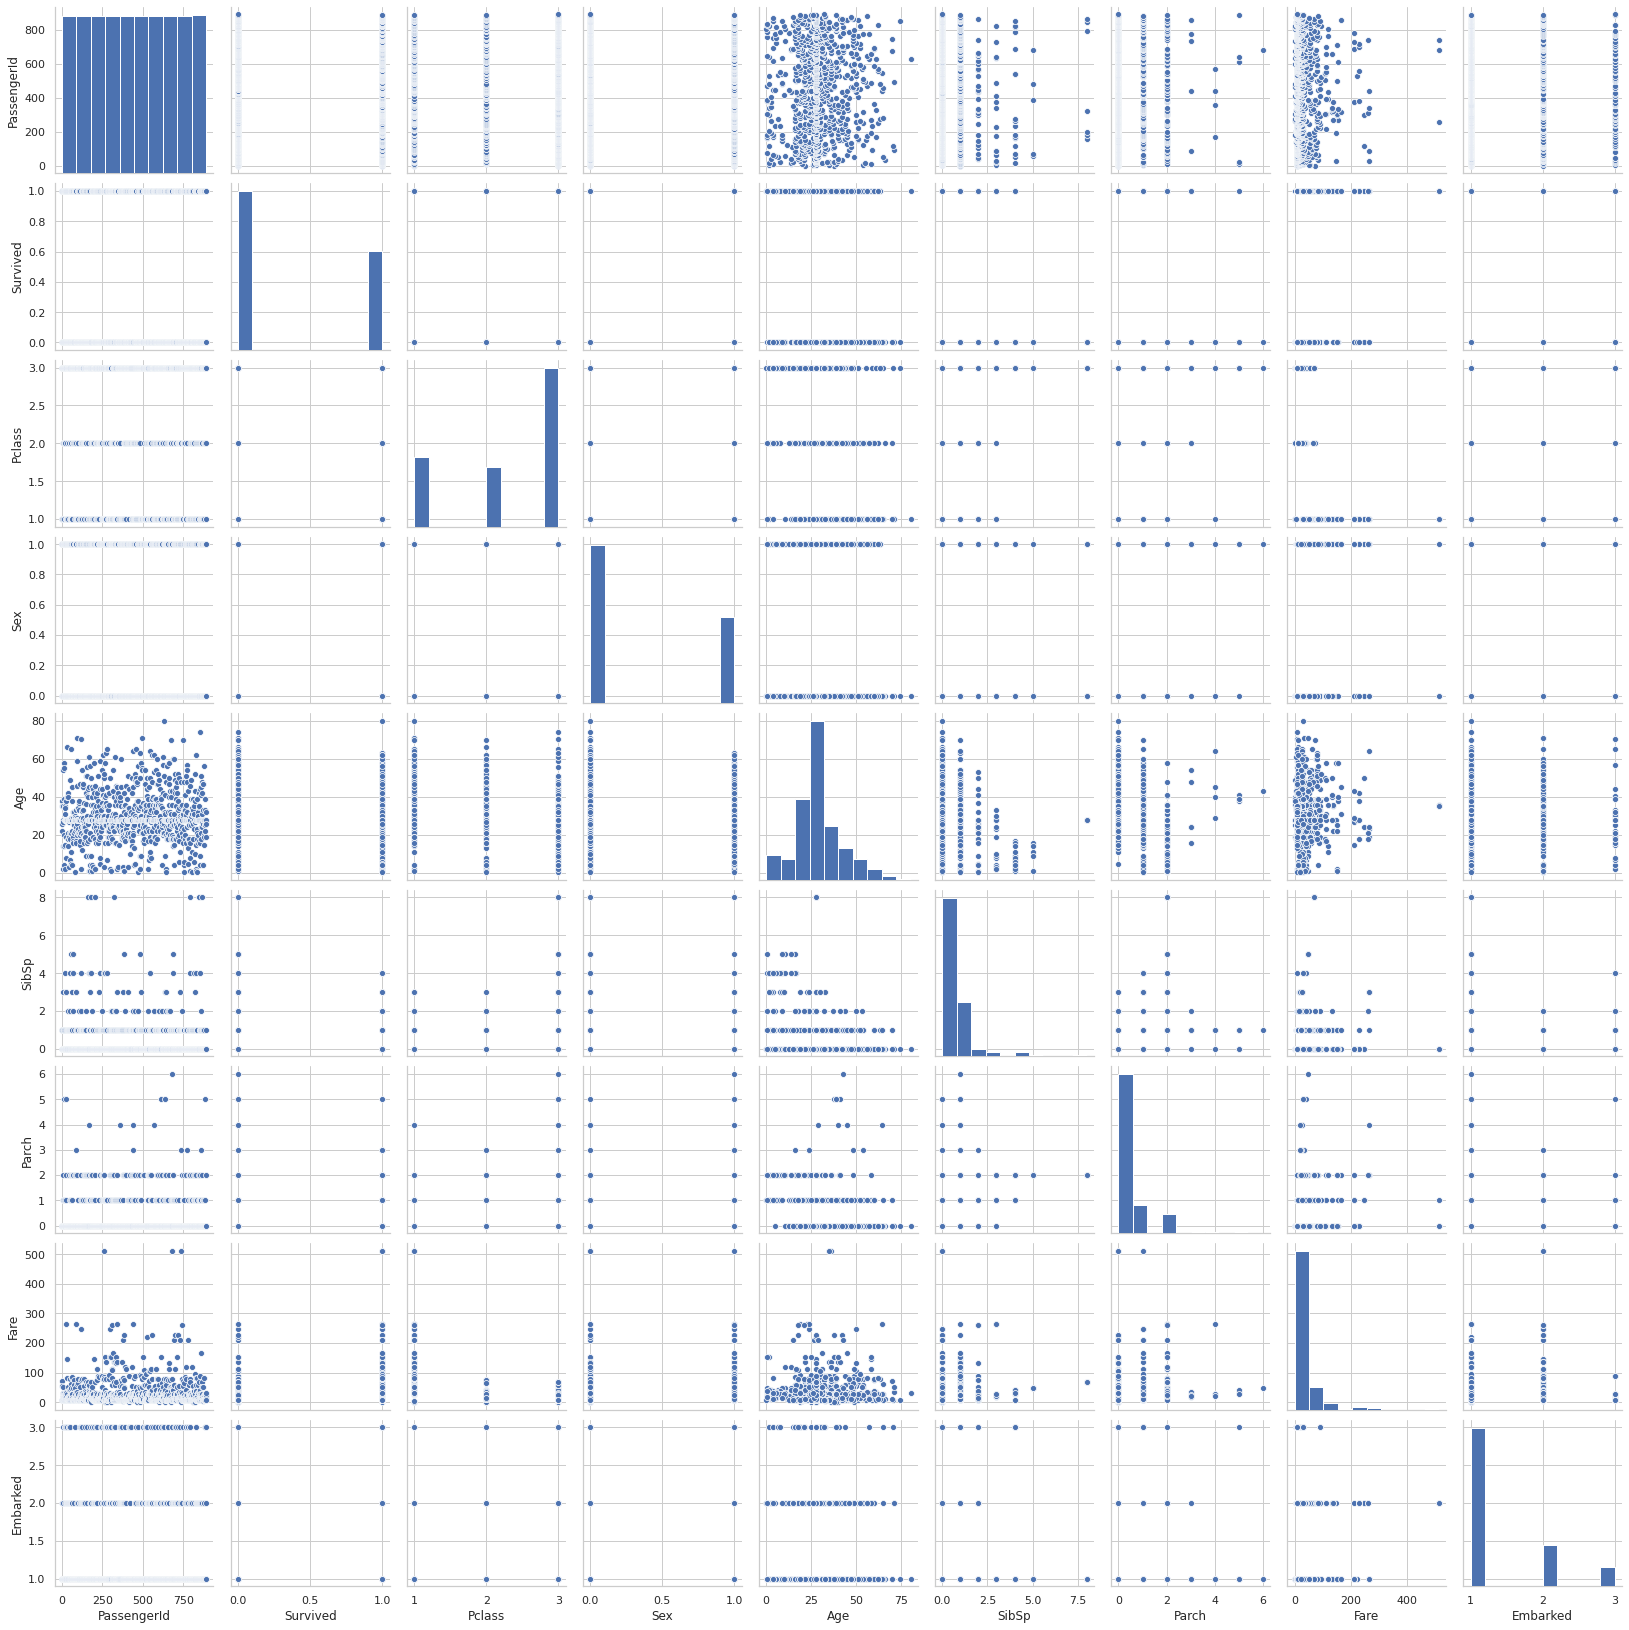

In [33]:

sns.set_style('whitegrid')
sns.pairplot(titanic_data)

### Slicing the dataframe

In [34]:
y = titanic_data['Survived']
X = titanic_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
print('X: ', X.shape)
print('y:', y.shape)


X:  (891, 8)
y: (891,)


### Splitting into train and test

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=4)
print("X_trian",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_trian (712, 8)
y_train (712,)
X_test (179, 8)
y_test (179,)


### Logistic Regression

In [36]:
clf =LogisticRegression(random_state=0)
clf.fit(X_train,y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7155963302752293

### KNN

In [39]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
y_predicted = neigh.predict(X_test)
f1_score(y_test,y_predicted)

0.4761904761904762

### RandomForest Classifier

In [41]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
y_pred = clf.predict(X_test)
f1_score(y_test,y_pred)

0.7706422018348624

In [43]:
test_survived = clf.predict(test_data)
test_survived

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#### ExtraTreesClassifier

In [44]:
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(n_estimators=100)
tree.fit(X_train,y_train)
y_predicted = tree.predict(X_test)

In [45]:
f1_score(y_test,y_predicted)

0.7747747747747747

In [46]:
test_survived = tree.predict(test_data)
test_survived

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
test_data['Survived'] = pd.DataFrame(test_survived)
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,34.5,0,0,7.8292,3,0
1,893,3,1,47.0,1,0,7.0000,1,0
2,894,2,0,62.0,0,0,9.6875,3,0
3,895,3,0,27.0,0,0,8.6625,1,0
4,896,3,1,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,8.0500,1,0
414,1306,1,1,39.0,0,0,108.9000,2,1
415,1307,3,0,38.5,0,0,7.2500,1,0
416,1308,3,0,27.0,0,0,8.0500,1,0


#### Submitting file

In [48]:
submit = test_data[['PassengerId','Survived']]
submit.to_csv("/kaggle/working/submit.csv", index=False)